## IMPORTING LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA PREPROCESSING

In [ ]:
data = pd.read_csv("Boston.csv")
# replacing misssing values with mean
for col in data.columns:
    u = sum(data[col])/len(data[col])
    data[col].fillna(u , inplace = True)

In [13]:
data.head(5)

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.isnull().sum()

Crime Rate                        0
Residential Proportion            0
non-retail business acres/Town    0
Charles River                     0
NO2 concentration                 0
Average Rooms/Dwelling.           0
Prior Built Units Proportion      0
Distance to Employment Centres    0
Radial Highways Distance          0
ValueProperty/tax rate            0
Teacher/town                      0
blacks/town                       0
Lower Status Percent              0
median home price                 0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crime Rate                      506 non-null    float64
 1   Residential Proportion          506 non-null    float64
 2   non-retail business acres/Town  506 non-null    float64
 3   Charles River                   506 non-null    float64
 4   NO2 concentration               506 non-null    float64
 5   Average Rooms/Dwelling.         506 non-null    float64
 6   Prior Built Units Proportion    506 non-null    float64
 7   Distance to Employment Centres  506 non-null    float64
 8   Radial Highways Distance        506 non-null    float64
 9   ValueProperty/tax rate          506 non-null    float64
 10  Teacher/town                    506 non-null    float64
 11  blacks/town                     506 non-null    float64
 12  Lower Status Percent            506 

In [16]:
data.describe()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## STANDARD SCALER

In [17]:
#Standrd scaler
data_scaled = data.drop("median home price" , axis = 1)
for col in list(data_scaled.columns):
    u = sum(data_scaled[col])/len(data_scaled[col])
    sigma = (((np.sum(data_scaled[col]**2)/len(data_scaled[col])))-(u**2))**0.5
    data_scaled[col] = (data_scaled[col] - u)/sigma

In [18]:
data_scaled["median home price"] = data["median home price"]

## DISPLAYING MEAN , MEDIAN , STANDARD DEVIATION FOR ALL FEATURES

In [19]:
def display_metrics(data):
    means ={}
    stds ={}
    medians = {}
    modes = {}
    for col in list(data.columns):
        means[col] = sum(data[col])/len(data[col])
        stds[col] = ((sum(data[col]**2)/ len(data[col])) - (means[col]**2))**0.5
        temp = list(data[col])
        temp.sort()
        medians[col] = temp[int(len(temp)/2)]
        freq = {}
        ans = None
        curr = 0
        for vals in data[col]:
            if(vals in freq.keys()):
                freq[vals]+=1
            else: freq[vals] = 1
            if(freq[vals]>curr):
                curr = freq[vals]
                ans = vals
        modes[col] = ans
    print(pd.DataFrame({"Feature" : data.columns , "Mean" : means.values() , "Median" : medians.values() , 
                        "Standard deviation" : stds.values() , "Mode" : modes.values()}))

In [20]:
display_metrics(data_scaled)

                           Feature          Mean     Median  \
0                       Crime Rate -7.797685e-18  -0.390359   
1           Residential Proportion  4.843513e-17  -0.487722   
2   non-retail business acres/Town -3.795822e-17  -0.211099   
3                    Charles River  3.620292e-18  -0.272599   
4                NO2 concentration -2.165045e-16  -0.144217   
5          Average Rooms/Dwelling. -1.040757e-16  -0.107753   
6     Prior Built Units Proportion -1.787485e-16   0.324494   
7   Distance to Employment Centres -1.083075e-16  -0.275402   
8         Radial Highways Distance  1.316470e-18  -0.523001   
9           ValueProperty/tax rate -6.513784e-18  -0.464673   
10                    Teacher/town -3.985887e-16   0.297977   
11                     blacks/town -1.166327e-16   0.381296   
12            Lower Status Percent -7.400258e-17  -0.178450   
13               median home price  2.253281e+01  21.200000   

    Standard deviation       Mode  
0             1.00

## PLOTTING SCATTER PLOTS ALONG WITH BEST FITTING LINE OF LINEAR REGRESSION FOR ALL FEATURES

In [21]:
def plot_graph(data , col2):
    for col1 in data.drop(col2 , axis = 1).columns:
        plt.scatter(x = data[col1] ,  y= data[col2] , label = "actual")
        x_bar = sum(data[col1])/len(data[col1])
        y_bar = sum(data[col2])/len(data[col2])
        numerator = sum((data[col1]-x_bar)*(data[col2]-y_bar))
        denom = sum((data[col1]-x_bar)**2)
        slope = numerator/denom
        intercept = y_bar - (slope*x_bar)
        x_values = list(data[col1])
        x_values.sort()
        y_values = [(slope*x) + intercept for x in x_values]
        plt.plot(x_values , y_values , label = "predicted",color = "r")
        plt.title(f"{col2} v/s {col1} , m = {round(slope ,2)} , c = {round(intercept , 2)}")
        plt.legend()
        plt.show()

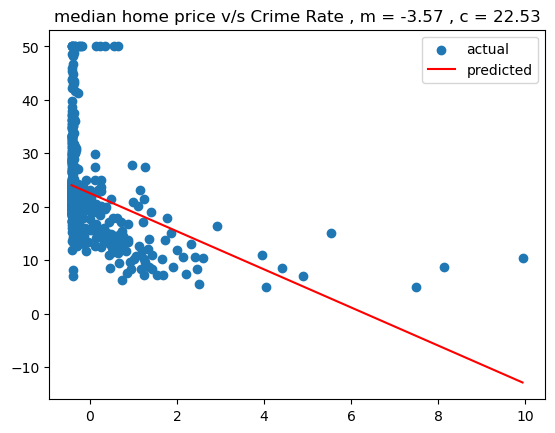

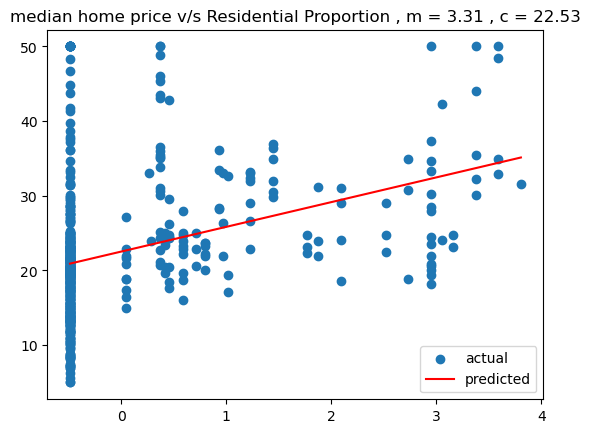

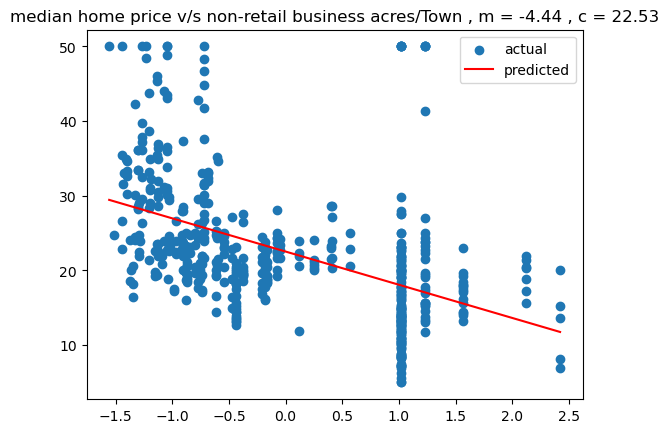

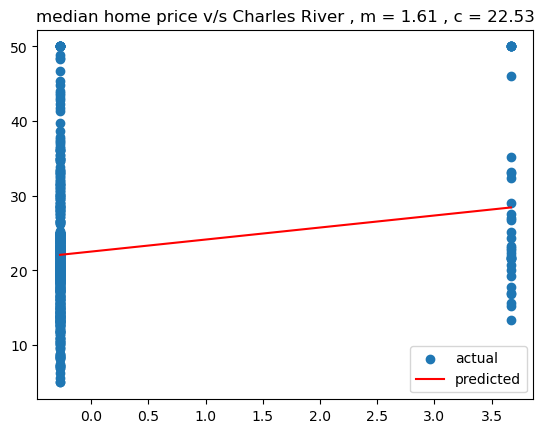

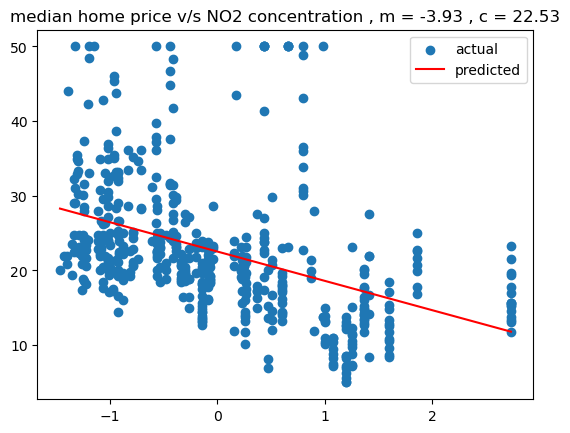

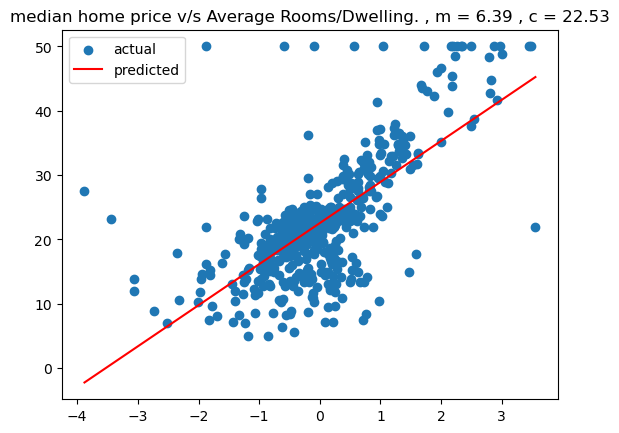

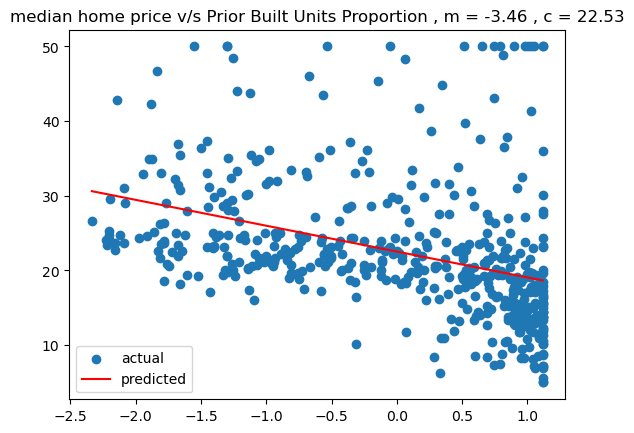

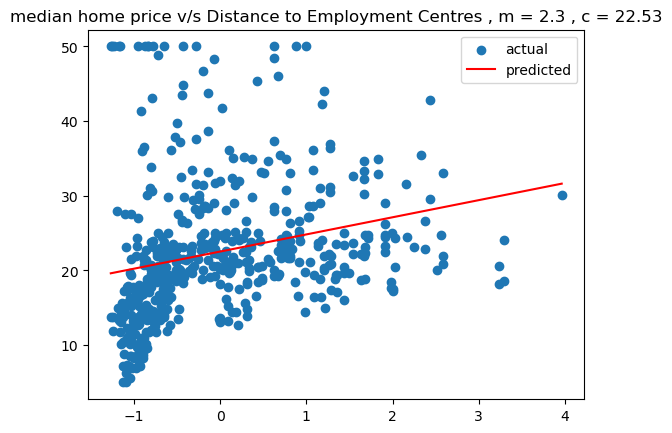

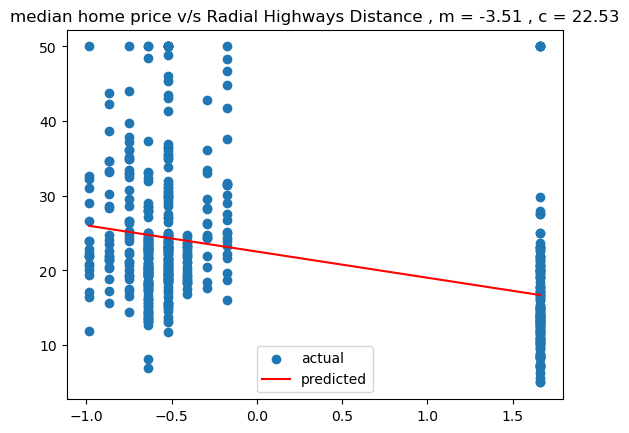

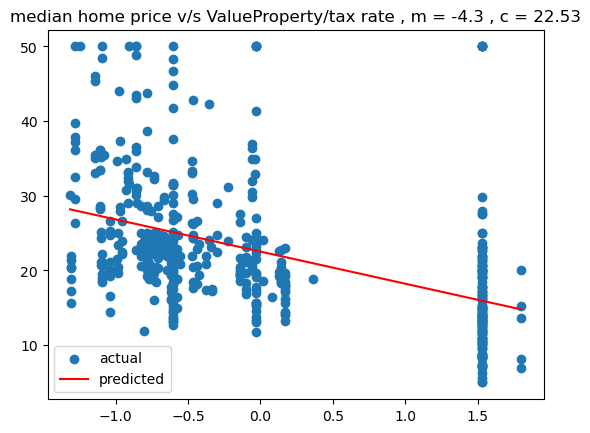

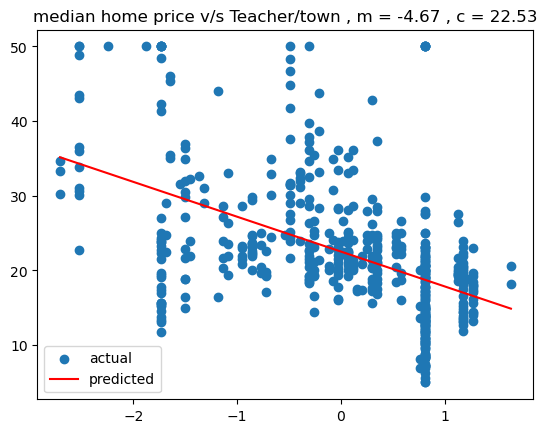

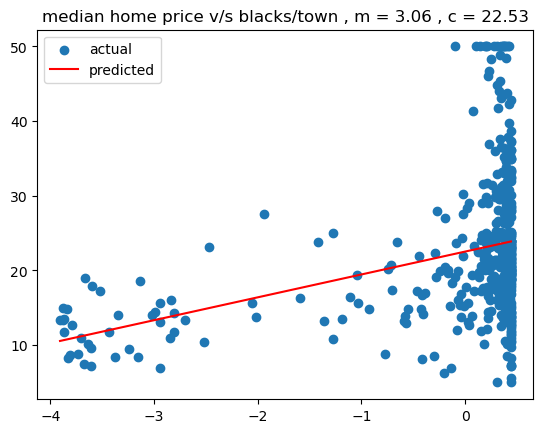

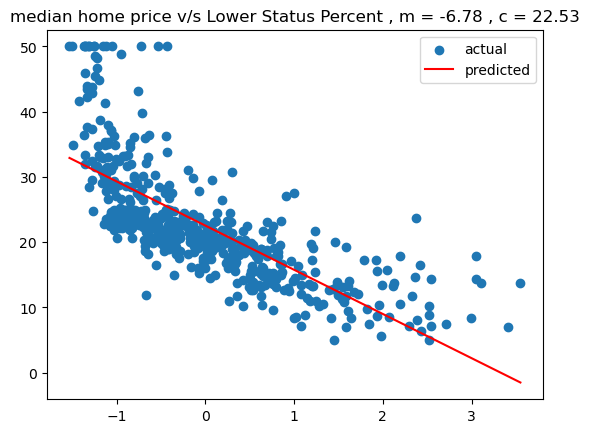

In [22]:
plot_graph(data_scaled , "median home price")